In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,Intitulé du poste,Date de publication,lieu,competences,salaire_minimum,salaire_maximum,Nom de la société,Type de contrat
0,5,data analyst,2022-12-31,maisons alfort,support sql data management business objects t...,45000.0,50000.0,fed it,cdd
1,7,data analyst,2022-12-18,paris,data management business intelligence bases de...,60000.0,62000.0,fed it,cdi
2,14,data scientist,2022-12-18,rueil malmaison,marketing data management support,60000.0,65000.0,fed it,cdi
3,16,consultant,2023-01-13,paris,big data oracle cloud sap python,60000.0,70000.0,selescope,NaN
4,19,chef de projet,2023-01-10,gennevilliers,marketing outils digital ux mobile,60000.0,70000.0,hays france,cdi


In [4]:
df.tail()

,Unnamed: 0,Intitulé du poste,Date de publication,lieu,competences,salaire_minimum,salaire_maximum,Nom de la société,Type de contrat
38,163,expert,2013-01-14,paris,middleware weblogic unix support tomcat,40000.0,60000.0,uniware global services,cdi
39,174,engineer,2023-01-12,paris,linux unix système infrastructure support,38000.0,55000.0,uniware global services,cdi
40,180,autres,2022-12-18,paris,web spring si sécurité digital,65000.0,70000.0,mr search,cdi
41,208,engineer,2022-12-18,nanterre,système windows microsoft cloud maintenance,45000.0,55000.0,experteam,cdi
42,228,data scientist,2022-12-30,neuilly sur seine,nosql unix java machine learning linux,38000.0,50000.0,beezen,cdi


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           43 non-null     int64  
 1   Intitulé du poste    43 non-null     object 
 2   Date de publication  43 non-null     object 
 3   lieu                 43 non-null     object 
 4   competences          43 non-null     object 
 5   salaire_minimum      43 non-null     float64
 6   salaire_maximum      43 non-null     float64
 7   Nom de la société    43 non-null     object 
 8   Type de contrat      39 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ KB


In [6]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())
df.describe()
df.dtypes

Unnamed: 0 43 [  5   7  14  16  19  21  24  25  28  38  43  53  65  67  74  76  79  95
  97  98 101 102 104 108 109 120 125 126 127 139 140 141 144 147 149 153
 156 158 163 174 180 208 228]
Intitulé du poste 10 ['data analyst' 'data scientist' 'consultant' 'chef de projet' 'autres'
 'business analyst' 'engineer' 'developer' 'architect' 'expert']
Date de publication 15 ['2022-12-31' '2022-12-18' '2023-01-13' '2023-01-10' '2023-01-15'
 '2022-12-17' '2022-12-27' '2013-01-14' '2022-12-29' '2022-12-25'
 '2023-01-08' '2022-12-19' '2023-01-12' '2022-12-26' '2022-12-30']
lieu 12 ['maisons alfort' 'paris' 'rueil malmaison' 'gennevilliers'
 'boulogne-billancourt' 'suresnes' 'neuilly sur seine' 'lisses'
 'paris 9ème (75)' 'neuilly-sur-seine' 'paris 09 (75)' 'nanterre']
competences 38 ['support sql data management business objects t-sql'
 'data management business intelligence bases de données'
 'marketing data management support' 'big data oracle cloud sap python'
 'marketing outils digital ux mo

Unnamed: 0               int64
Intitulé du poste       object
Date de publication     object
lieu                    object
competences             object
salaire_minimum        float64
salaire_maximum        float64
Nom de la société       object
Type de contrat         object
dtype: object

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

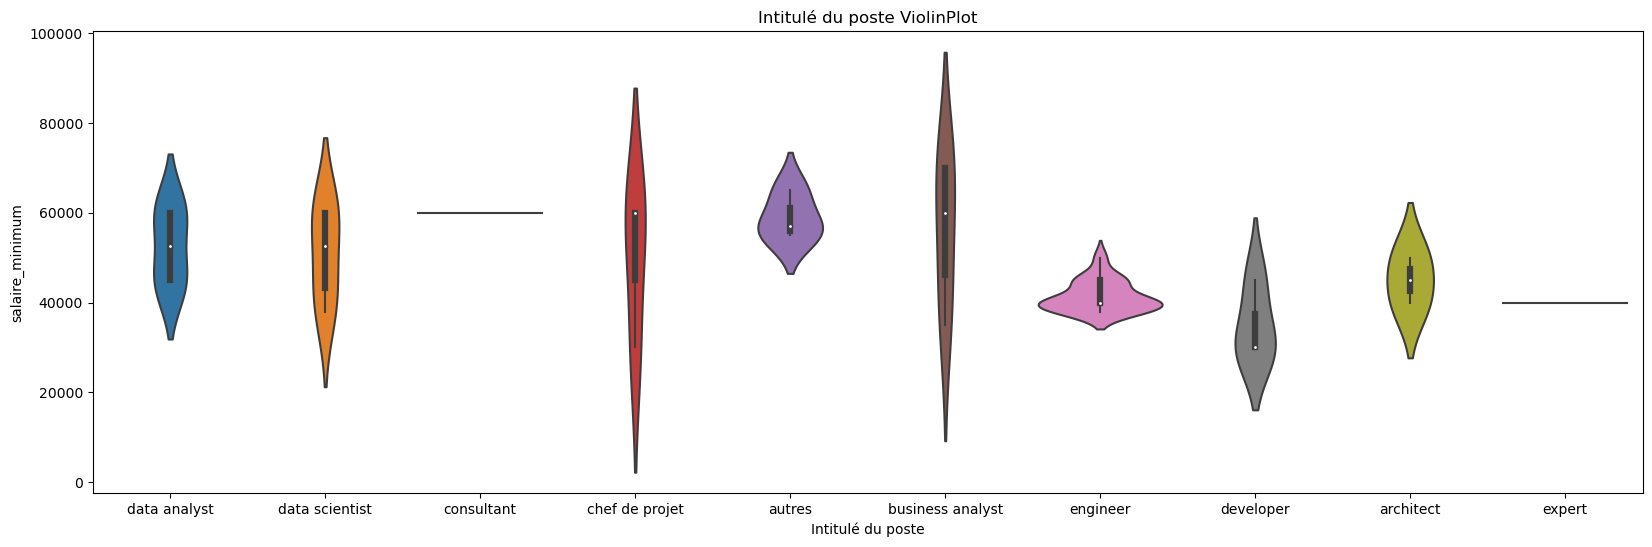

In [8]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Intitulé du poste', y='salaire_minimum', data=df).set_title('Intitulé du poste ViolinPlot')
plt.show()

Violin plot shows the minimum salary range for the different professionals

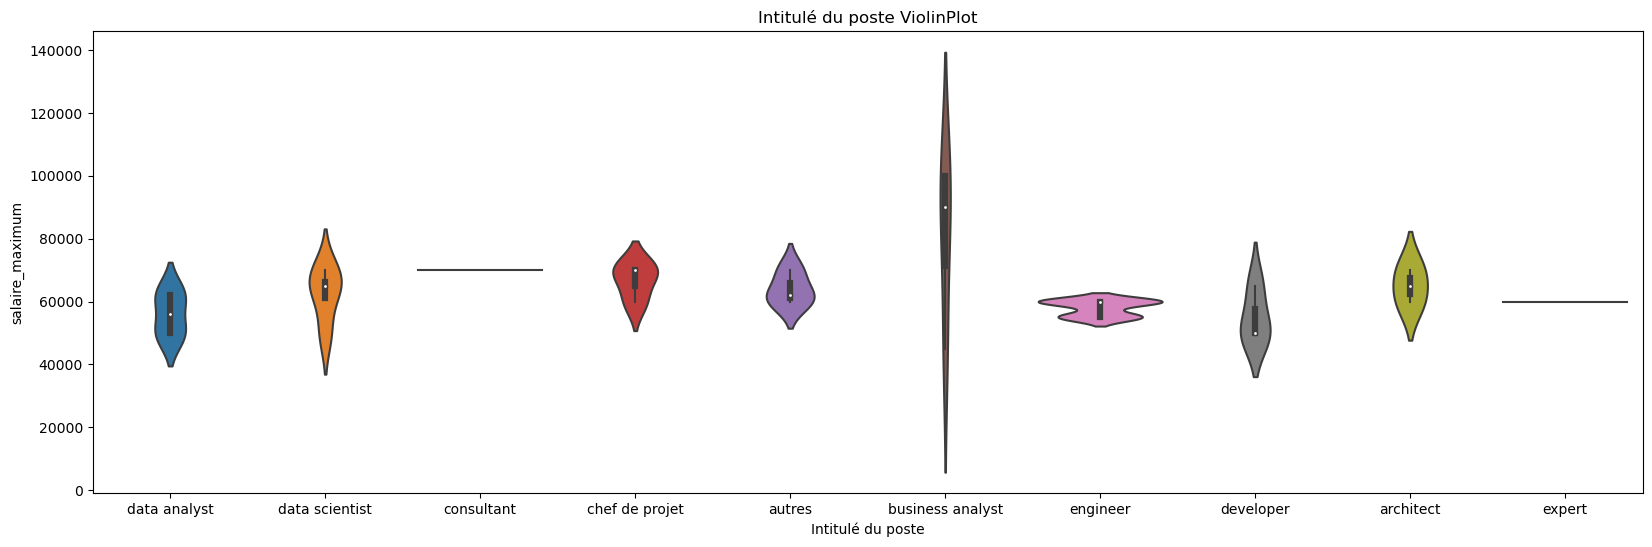

In [9]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Intitulé du poste', y='salaire_maximum', data=df).set_title('Intitulé du poste ViolinPlot')
plt.show()

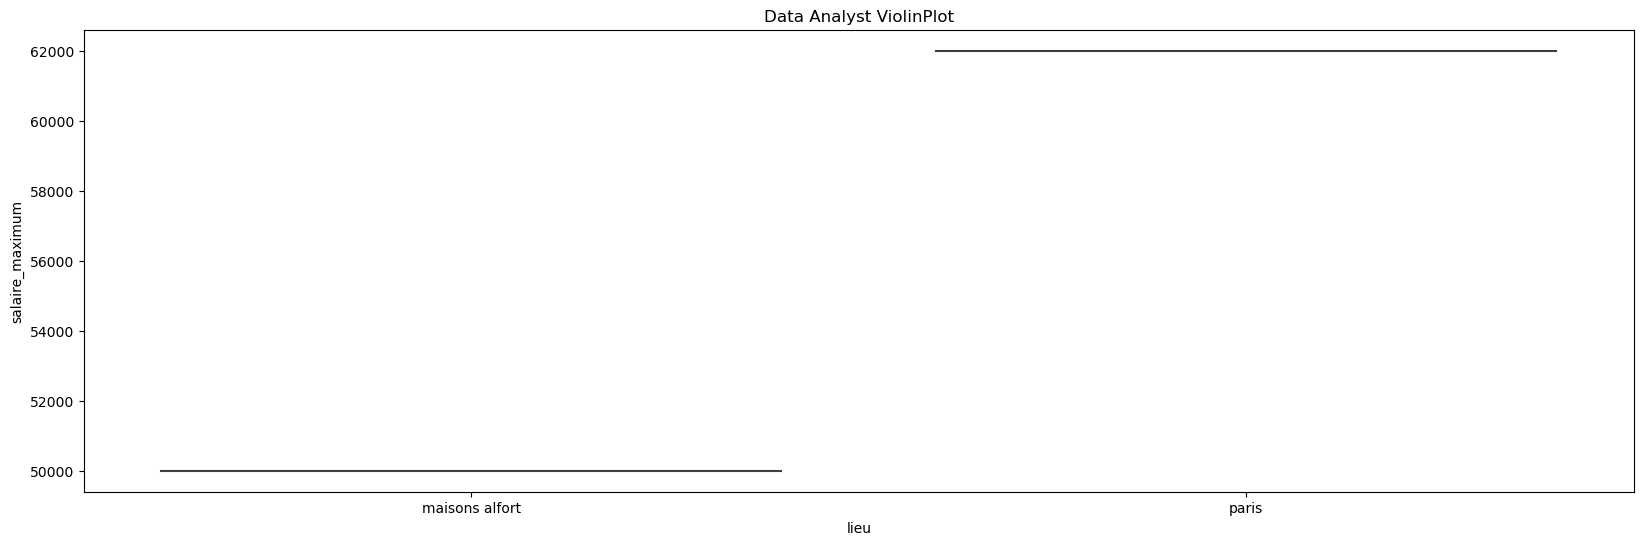

In [10]:
plt.figure(figsize=(20,6))
sns.violinplot(x='lieu', y='salaire_maximum', data=df[df['Intitulé du poste']=='data analyst']).set_title('Data Analyst ViolinPlot')
plt.show()

In [11]:
df.corr()

,Unnamed: 0,salaire_minimum,salaire_maximum
Unnamed: 0,1.000000,-0.475072,-0.382138
salaire_minimum,-0.475072,1.000000,0.745505
salaire_maximum,-0.382138,0.745505,1.000000


In [12]:
import numpy as np

Import libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Linear Regression**

Exclude missing value rows

In [14]:
df=df.dropna()

Select input (X) and target (Y)

In [15]:
X=df['Unnamed: 0'].values
Y=df['salaire_minimum'].values

Split dataset into two parts (training and testing)

In [16]:
#Splitting the data into Train and Test'
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)

Define model in this case it's linear regression

In [17]:
#Training the model using X_train, Y_train
model = LinearRegression()
model.fit(X_train.reshape(-1,1),Y_train)

LinearRegression()

Prediction

In [18]:
#Predicting using the trained model - X_test
Y_pred=model.predict(X_test.reshape(-1,1))

In [19]:
print(Y_test) #Test data - actual data
print(Y_pred) #Model predicted dataset

[55000. 38000. 40000. 30000. 40000. 50000. 60000. 45000. 60000. 38000.]
[48050.04495553 43513.78670936 43403.14626433 42997.46463256
 42813.06389084 43698.18745107 46353.55813176 44214.50952787
 46095.39709336 43624.42715439]


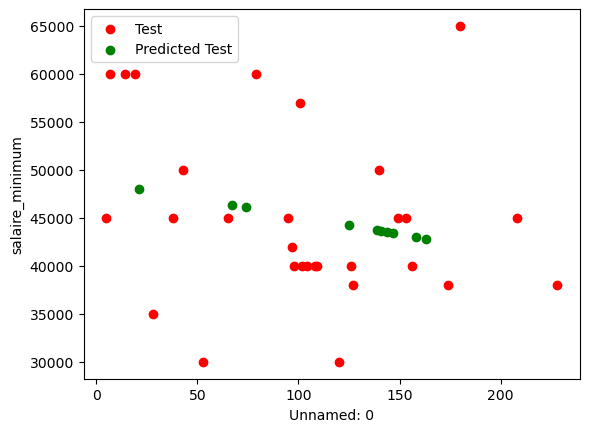

In [20]:
plt.scatter(X_train,Y_train, color='red',label='Test')
plt.scatter(X_test,Y_pred,color='green',label='Predicted Test')
plt.xlabel('Unnamed: 0')
plt.ylabel('salaire_minimum')
plt.legend()
plt.xticks()
plt.yticks()
plt.show()

Intercept and Coefficient Calculations

In [21]:
print('Intercept', model.intercept_)
print('Coefficient', model.coef_)
print(model.coef_,'x +',model.intercept_)

Intercept 48824.52807073281
Coefficient [-36.88014834]
[-36.88014834] x + 48824.52807073281


Calculate RMSE and R2 score

In [22]:
# model evaluation
rmse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Root Mean Square Error', rmse)
print('R2 Score', r2)

Root Mean Square Error 71865991.39746416
R2 Score 0.23903016309334857
